# Visualizando e Manipulando imagens fits

Demonstrando o uso do astropy utililizando as seguintes funções:
- astropy.utils.data para download
- astropy.io.fits para abrir o arquivo
- matplotlib para vizualizar a imagem com diferentes escalas de cores, histogramas e concatenar imagens 

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm
%matplotlib inline 
from astropy.utils.data import download_file
# o coomando "%matplotlib inline" é utilizado para visualizar a imagem apenas no jupyter-notebook

O primeiro passo, porém não essencial, é verificar as inforamções do cabeçario da imagem,  deve-se abrir o arquivo fits para carregar os dados da imagem.

In [4]:
# O comando abaixo aloca os dados para verificar o que existe dentro do arquivo fits.

file = '/home/usu/HorseHead.fits'
hdu_list = fits.open(file)
hdu_list.info()


# OBS.:
# - Caso o usuário não tenha algum arquivo fits, poderá fazer o download de um arquivo
# através do comando abaixo:
# from astropy.utils.data import download_file
# image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )


Filename: /home/j/HorseHead.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     161   (891, 893)   int16   
1    er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Geralmente as informações de imagem estão localizadas no bloco primário. Os blocos são numerados e podem ser acessados por indexação hdu_list.

In [5]:
image_data = hdu_list[0].data

Para verificar as dimensões da imagem basta olhar para o shape da matriz.

In [6]:
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(893, 891)


Não é necessário deixar o arquivo fits aberto, portanto, utilizamos o seguinte comando para fecha-lo.

In [7]:
hdu_list.close()

Caso não seja necessário verificar as informações do header, pode-se abrir a imagem da seguinte forma:

In [8]:
image_data = fits.getdata(file)
print(type(image_data))
print(image_data.shape)


<type 'numpy.ndarray'>
(893, 891)


Visualização e analise da imagem

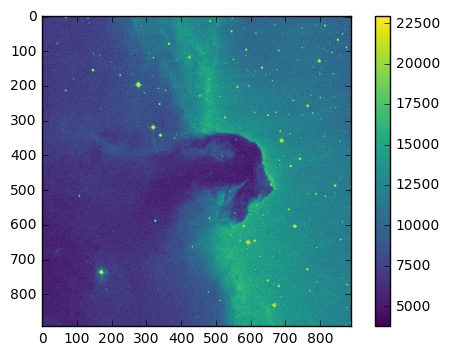

In [10]:
plt.imshow(image_data, cmap='viridis')
plt.colorbar()


Obtendo alguns parametros básicos da imagem

In [89]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

('Min:', 3759)
('Max:', 22918)
('Mean:', 9831.4816762875744)
('Stdev:', 3032.3927542049046)


Construindo um histograma

In [90]:
print(type(image_data.flat))

<type 'numpy.flatiter'>


891.999439462


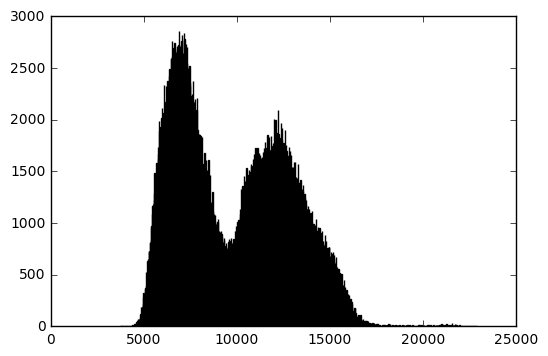

In [16]:
sample = len(np.array(image_data.flat))
NBINS = np.sqrt(sample)
print NBINS
histogram = plt.hist(np.array(image_data.flat), NBINS, range = [4500.,20000.], facecolor = 'r' )


Apresentando os dados em escala logaritimica

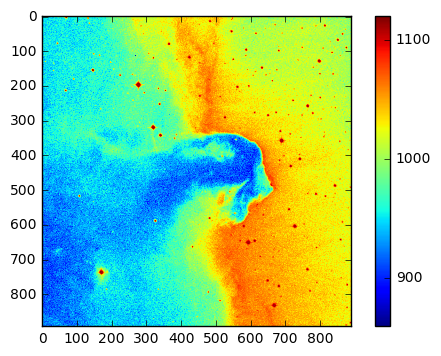

In [18]:
plt.imshow(image_data, cmap='jet', norm=LogNorm())

cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['900','1000','1100'])



# Concatenar imagens fits


In [93]:
image_list = []
for n in ['1','2','3','4','5']:
    image_list.append('/home/usu/M13_blue_000' + n +'.fits') 

image_concat = []
for image in image_list:
    image_concat.append(fits.getdata(image))
    



Somando as imagens da lista:

In [94]:
final_image = np.zeros(shape=image_concat[0].shape)

for image in image_concat:
    final_image += image


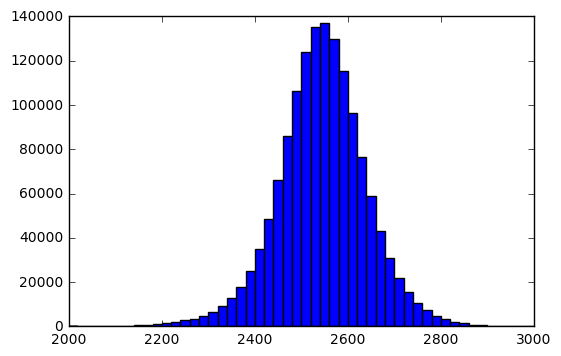

In [95]:
image_hist = plt.hist(np.array(final_image.flat), 50, range =[2000.,3000.])

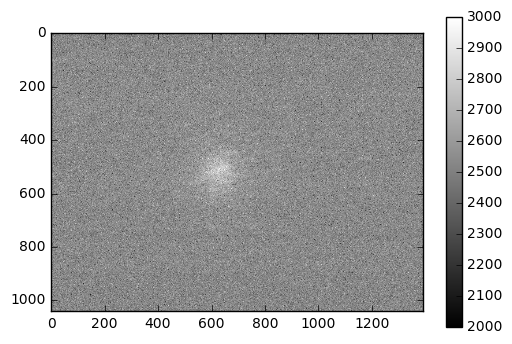

In [96]:
plt.imshow(final_image, cmap='gray', vmin=2.e3, vmax=3.e3)
plt.colorbar()

# Salvando o arquivo gerado

In [1]:
outfile = 'stacked_M13_blue.fits'

hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, clobber=True)

NameError: name 'fits' is not defined

# Trabalhando com várias imagens 


Ao trabalhar com diversas imagens, torna-se interessante utilizar um script para realizar a análise anterior.
Com isso, pode ser usado o modulo optparse (Mais detalhes em :https://docs.python.org/2/library/optparse.html), que permite uma análise de opções por linha de comando, incrementando uma string por linha de comando dentro do código.
Para importar e utilizar esse modulo, deve-se seguir os seguintes comandos.


 
>import os, sys

>from optparse import OptionParser


>parser = OptionParser()
>parser.add_option("-i", "--inputimage", dest="inputimage", help="input FITS image",type='string',default="")
parser.add_option("-v", action="store_true", dest="verbose", help="verbose",default=False)

>try:
>>    options,args = parser.parse_args(sys.argv[1:])
>except:
>>    print "Error: check usage with fitscubestats -h ";sys.exit(1);

>if options.verbose:
>>    print 'Input FITS image: ', options.inputimage
>>    print 'Input Ref line: ', options.referenceline



>#file = '/home/usu/HorseHead.fits'
>file = options.inputimage  # o objeto file irá receber as entredas de imagens definidas ao chamar o script

>hdu_list = fits.open(file)
>hdu_list.info()

Abaixo temos um exemplo de como chamar as imagens pelo script.

./work.py --inputimage=/home/usu/M57_001.fits

